In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("unclean_smartwatch_health_data1.csv")
print(data.head())
print(data.info())

   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 489 non-nu

In [6]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Standardize column names
data.columns = (
    data.columns
    .str.strip()              # remove leading/trailing spaces
    .str.lower()              # lowercase
    .str.replace(" ", "_")    # replace spaces with underscores
)

print("Cleaned column names:", data.columns)

# 2. Convert sleep_duration_(hours) to numeric
data['sleep_duration_(hours)'] = pd.to_numeric(
    data['sleep_duration_(hours)'], errors='coerce'
)

# 3. Clean categorical columns
# Fix typos in activity_level
data['activity_level'] = (
    data['activity_level']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# Stress level should be numeric
data['stress_level'] = pd.to_numeric(data['stress_level'], errors='coerce')

# 4. Handle missing values
for col in data.select_dtypes(include='float64').columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 5. Verify cleaning
print(data.info())
print(data.head())


Cleaned column names: Index(['user_id', 'heart_rate_(bpm)', 'blood_oxygen_level_(%)', 'step_count',
       'sleep_duration_(hours)', 'activity_level', 'stress_level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 499 non-null    float64
 1   heart_rate_(bpm)        499 non-null    float64
 2   blood_oxygen_level_(%)  499 non-null    float64
 3   step_count              499 non-null    float64
 4   sleep_duration_(hours)  499 non-null    float64
 5   activity_level          499 non-null    object 
 6   stress_level            499 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.4+ KB
None
       user_id  heart_rate_(bpm)  blood_oxygen_level_(%)    step_count  \
0  4174.000000         58.939776               98.809650   5450.390578   
1  3060.691207         

In [7]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 2. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 3. Convert numeric columns
data['sleep'] = pd.to_numeric(data['sleep'], errors='coerce')
data['stress'] = pd.to_numeric(data['stress'], errors='coerce')
data['heart_rate'] = pd.to_numeric(data['heart_rate'], errors='coerce')
data['oxygen'] = pd.to_numeric(data['oxygen'], errors='coerce')
data['steps'] = pd.to_numeric(data['steps'], errors='coerce')
data['user_id'] = pd.to_numeric(data['user_id'], errors='coerce')

# 4. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 5. Handle missing values
for col in ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 6. Verify cleaning
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     499 non-null    float64
 1   heart_rate  499 non-null    float64
 2   oxygen      499 non-null    float64
 3   steps       499 non-null    float64
 4   sleep       499 non-null    float64
 5   activity    499 non-null    object 
 6   stress      499 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.4+ KB
None
       user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.000000  96.894213  13797.338044  7.367790         Active   
4  2130.000000   61.950165  98.583797  15679.067648  6.454847  Highly

In [8]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())


Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.000000  96.894213  13797.338044  7.367790         Active   
4  2130.000000   61.950165  98.583797  15679.067648  6.454847  Highly Activ

In [10]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# 9. Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())
data['heart_rate']
data['activity']



Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.000000  96.894213  13797.338044  7.367790         Active   
4  2130.000000   61.950165  98.583797  15679.067648  6.454847  Highly Activ

0      Highly Active
1      Highly Active
2      Highly Active
3             Active
4      Highly Active
           ...      
494           Active
495        Sedentary
496           Active
497    Highly Active
498        Sedentary
Name: activity, Length: 499, dtype: object

In [11]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# 9. Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())


Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.000000  96.894213  13797.338044  7.367790         Active   
4  2130.000000   61.950165  98.583797  15679.067648  6.454847  Highly Activ

In [13]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nCleaned column names:", data.columns)
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# 9. Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())
data['heart_rate']
data['activity']
data['sleep']



Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Cleaned column names: Index(['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'activity',
       'stress'],
      dtype='object')

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.

0      7.167236
1      6.538239
2      6.454847
3      7.367790
4      6.454847
         ...   
494    3.516177
495    5.430469
496    6.091179
497    7.419715
498    6.171794
Name: sleep, Length: 499, dtype: float64

In [15]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nCleaned column names:", data.columns)
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# 9. Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())
data['heart_rate']
data['activity']
data['sleep']
data['stress']



Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Cleaned column names: Index(['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'activity',
       'stress'],
      dtype='object')

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.

0      1.000000
1      5.000000
2      5.000000
3      3.000000
4      6.000000
         ...   
494    5.549587
495    2.000000
496    5.000000
497    8.000000
498    8.000000
Name: stress, Length: 499, dtype: float64

In [22]:
import pandas as pd

# Example: load your dataset
# data = pd.read_csv("your_file.csv")

# 1. Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# 2. Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# 3. Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# 4. Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 5. Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# 6. Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# 7. Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# 8. Verify cleaning
print("\nCleaned column names:", data.columns.tolist())
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# 9. Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())


Missing values before cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Cleaned column names: ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'activity', 'stress']

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236  Highly Active   
1  3060.691207   76.632718  98.532195    727.601610  6.538239  Highly Active   
2  1860.000000  247.803052  97.052954   2826.521994  6.454847  Highly Active   
3  2294.000000   40.000000  96.894213  13797.338044  7.3

In [1]:
import os
os.getcwd()

'c:\\Users\\DELL\\OneDrive\\Desktop\\HealthHackathon'

In [ ]:
import pandas as pd
import os

# STEP 1: Check files in your folder
print("Files in HealthHackathon folder:\n", os.listdir("C:/Users/DELL/OneDrive/Desktop/HealthHackathon"))

# STEP 2: Load your dataset (replace with the actual filename from the list above)
data = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/HealthHackathon/unclean_smartwatch_health_data1.csv")

# STEP 3: Show missing values before cleaning
print("Missing values before cleaning:\n", data.isna().sum())

# STEP 4: Standardize column names
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# STEP 5: Rename to short, clean names
data.rename(columns={
    'user_id': 'user_id',
    'heart_rate_(bpm)': 'heart_rate',
    'blood_oxygen_level_(%)': 'oxygen',
    'step_count': 'steps',
    'sleep_duration_(hours)': 'sleep',
    'activity_level': 'activity',
    'stress_level': 'stress'
}, inplace=True)

# STEP 6: Convert numeric columns safely
numeric_cols = ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'stress']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# STEP 7: Clean categorical values
data['activity'] = (
    data['activity']
    .str.strip()
    .str.replace("Highly_Active", "Highly Active", regex=False)
    .str.replace("Actve", "Active", regex=False)
)

# STEP 8: Handle missing values
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)

data['activity'].fillna(data['activity'].mode()[0], inplace=True)

# STEP 9: Show missing values after cleaning
print("\nMissing values after cleaning:\n", data.isna().sum())

# STEP 10: Verify cleaning
print("\nCleaned column names:", data.columns.tolist())
print("\nData types:\n", data.dtypes)
print("\nPreview of cleaned data:\n", data.head())

# STEP 11: Summary statistics for numeric columns
print("\nSummary statistics:\n", data[numeric_cols].describe())


Files in HealthHackathon folder:
 ['.portal', 'hackthon.py', 'hackthon125.ppy.txt', 'healthcare.ipynb', 'unclean_smartwatch_health_data1.csv']
Missing values before cleaning:
 User ID                   10
Heart Rate (BPM)          20
Blood Oxygen Level (%)    12
Step Count                 2
Sleep Duration (hours)     7
Activity Level            10
Stress Level               9
dtype: int64

Missing values after cleaning:
 user_id       0
heart_rate    0
oxygen        0
steps         0
sleep         0
activity      0
stress        0
dtype: int64

Cleaned column names: ['user_id', 'heart_rate', 'oxygen', 'steps', 'sleep', 'activity', 'stress']

Data types:
 user_id       float64
heart_rate    float64
oxygen        float64
steps         float64
sleep         float64
activity       object
stress        float64
dtype: object

Preview of cleaned data:
        user_id  heart_rate     oxygen         steps     sleep       activity  \
0  4174.000000   58.939776  98.809650   5450.390578  7.167236 

In [1]:
from sklearn.tree import DecisionTreeClassifier
print("Sklearn working!")

Sklearn working!


In [6]:
import pandas as pd

# Correct file path
input_path = r"c:\Users\DELL\OneDrive\Desktop\HealthHackathon\unclean_smartwatch_health_data1.csv"

# Load dataset
df = pd.read_csv(input_path)

print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


Loaded dataset shape: (499, 7)
Columns: ['User ID', 'Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Activity Level', 'Stress Level']


In [7]:
output_path = r"c:\Users\DELL\OneDrive\Desktop\HealthHackathon\cleaned_dataset.csv"
df.to_csv(output_path, index=False)

print("Saved cleaned dataset to:", output_path)


Saved cleaned dataset to: c:\Users\DELL\OneDrive\Desktop\HealthHackathon\cleaned_dataset.csv


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load cleaned dataset
data = pd.read_csv("cleaned_dataset.csv")

# 2️⃣ Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[()]", "", regex=True)

# 3️⃣ Ensure Risk Level exists
def risk_level(row):
    if row['heart_rate_bpm'] > 180 or row['blood_oxygen_level_%'] < 95 or row['stress_level'] >= 8:
        return "High Risk"
    elif row['heart_rate_bpm'] > 100 or row['stress_level'] >= 5:
        return "Moderate Risk"
    else:
        return "Low Risk"

if 'risk_level' not in data.columns:
    data['risk_level'] = data.apply(risk_level, axis=1)

# 4️⃣ Encode categorical column (activity_level)
le = LabelEncoder()
data['activity_level'] = le.fit_transform(data['activity_level'])

# 5️⃣ Select Features (X) and Target (y)
X = data.drop("risk_level", axis=1)
y = data["risk_level"]

# 6️⃣ Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7️⃣ Create Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# 8️⃣ Train model
model.fit(X_train, y_train)

# 9️⃣ Make predictions
y_pred = model.predict(X_test)

# 🔟 Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Model Accuracy: 0.98

Confusion Matrix:
 [[33  0  1]
 [ 0 36  0]
 [ 0  1 29]]

Classification Report:
                precision    recall  f1-score   support

    High Risk       1.00      0.97      0.99        34
     Low Risk       0.97      1.00      0.99        36
Moderate Risk       0.97      0.97      0.97        30

     accuracy                           0.98       100
    macro avg       0.98      0.98      0.98       100
 weighted avg       0.98      0.98      0.98       100



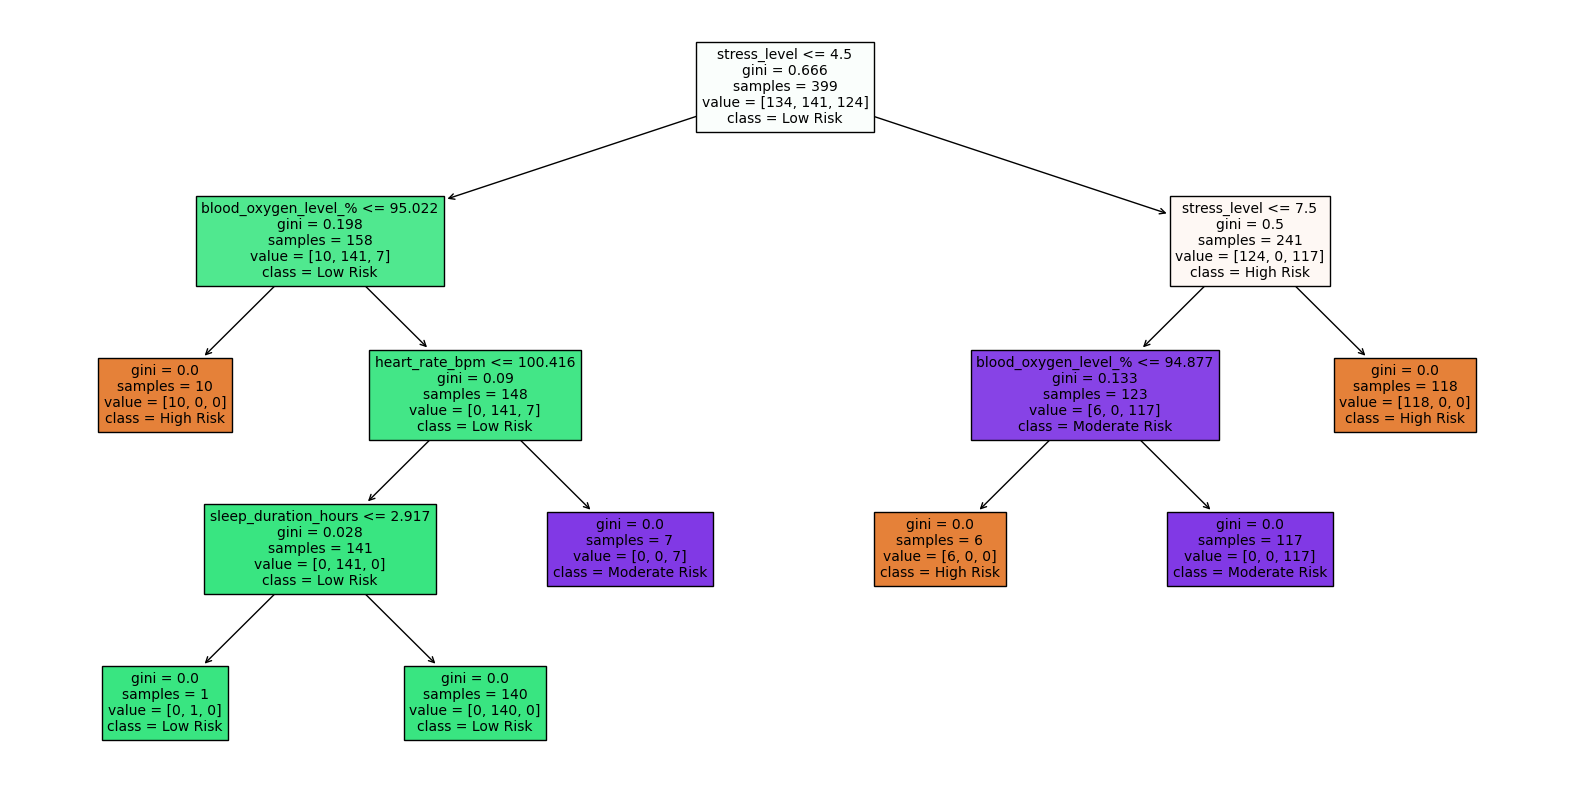

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(
    model,
    feature_names=list(X.columns),        # convert Index to list
    class_names=list(model.classes_),     # convert array to list
    filled=True,
    fontsize=10
)
plt.show()


In [18]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))